<a href="https://colab.research.google.com/github/sheon-j/nlp-study/blob/main/tensorflow-nlp-tutorial/week04_a_summary_of_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Study: Week 4 - A Summary of Deep Learning

[딥 러닝을 이용한 자연어 처리 입문](https://wikidocs.net/book/2155) 스터디

---

**Contents**
10. 다층 퍼셉트론(MultiLayer Perceptron, MLP)으로 텍스트 분류하기
11. 피드 포워드 신경망 언어 모델(Neural Network Language Model, NNLM)

## 10. 다층 퍼셉트론(MultiLayer Perceptron, MLP)으로 텍스트 분류하기
* 다층 퍼셉트론(Multilayer Perceptron, MLP)으로 텍스트 분류를 수행

### 10.1. 다층 퍼셉트론(MultiLayer Perceptron, MLP)
![img](https://wikidocs.net/images/page/24987/mlp_final.PNG)
* 다층 퍼셉트론(MultiLayer Perceptron, MLP)
  * 단층 퍼셉트론에서 은닉층이 1개 이상 추가 된 신경망
  * 피드 포워드 신경망의 기본적인 형태
* 피드 포워드 신경망(Feed Forward Neural Network, FFNN)
  * 입력층에서 출력층으로 오직 한 방향으로 연산하는 신경망 (<-> 순환신경망)
  * 지금까지 배운 개념을 활용해 자연어 처리에 목적

### 10.2. 케라스의 texts_to_matrix() 이해하기

* 입력된 텍스트 데이터로부터 행렬(matrix)를 만드는 도구
* `texts_to_matrx()`의 네 가지 모드
  1. `binary`
  2. `count`
  3. `freq`
  4. `tfidf`

In [1]:
# 토큰화와 정수 인코딩
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


#### (1) count
* 문서 단어 행렬(Document-Term Matrix, DTM)을 생성
  * BoW 기반. 순서 없음
* word_index의 결과 matrix

| 문장/토큰               | 바나나 | 먹고 | 싶은 | 사과 | 길고 | 노란 | 저는 | 과일이 | 좋아요 |
| ----------------------- | ------ | ---- | ---- | ---- | ---- | ---- | ---- | ------ | ------ |
| 먹고 싶은 사과          | 0      | 1    | 1    | 1    | 0    | 0    | 0    | 0      | 0      |
| 먹고 싶은 바나나        | 1      | 1    | 1    | 0    | 0    | 0    | 0    | 0      | 0      |
| 길고 노란 바나나 바나나 | 2      | 0    | 0    | 0    | 1    | 1    | 0    | 0      | 0      |
| 저는 과일이 좋아요      | 0      | 0    | 0    | 0    | 0    | 0    | 1    | 1      | 1      |




In [2]:
# texts_to_matrix의 입력으로 texts를 넣고, 모드는 'count'
print(tokenizer.texts_to_matrix(texts, mode = 'count'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


#### (2) binary
* 존재 유무로만 행렬을 표현 (True / False)

In [3]:
print(tokenizer.texts_to_matrix(texts, mode = 'binary'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


#### (3) tfidf
* TF-IDF (Term Frequency-Inverse Document Frequency, 단어 빈도-역 문서 빈도)
  * 빈도수 기반 단어 표현 + 중요도(가중치)
  * DTM 내에 있는 각 단어에 대한 중요도를 계산
  * TF 구현식이 기존 방식과 조금 다름

In [4]:
# 둘째 자리까지 반올림하여 출력
print(tokenizer.texts_to_matrix(texts, mode = 'tfidf').round(2))

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


#### (4) freq
* $\frac{단어 등장 횟수}{모든 단어의 개수}$
* 예시 '길고 노란 바나나 바나나'
  * 바나나: 2/4
  * 길고, 노란: 1/4

In [5]:
# 둘째 자리까지 반올림하여 출력
print(tokenizer.texts_to_matrix(texts, mode = 'freq').round(2))

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


### 10.3. 20개 뉴스 그룹(Twenty Newsgroups) 데이터에 대한 이해
* 사이킷런의 내장 데이터셋
* 20개의 다른 주제를 가진 18,846개의 뉴스 그룹 이메일 데이터
* 과제: 테스트 데이터에서 이메일 본문을 보고 20개의 주제 중 어떤 주제인지를 맞추는 것

#### (1) 데이터 확인

In [6]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

# 'train'을 기재하면 훈련 데이터만 리턴 (all/train/test)
newsdata = fetch_20newsgroups(subset='train')

In [7]:
print('데이터 속성:', *newsdata.keys()) # data, target(target_name)
print('훈련용 샘플의 개수:', len(newsdata.data))
print('총 주제의 개수: ', len(newsdata.target_names))
newsdata.target_names

데이터 속성: data filenames target_names target DESCR
훈련용 샘플의 개수: 11314
총 주제의 개수:  20


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [8]:
print(newsdata.data[8])
print(newsdata.target[8], newsdata.target_names[2])

From: holmes7000@iscsvax.uni.edu
Subject: WIn 3.0 ICON HELP PLEASE!
Organization: University of Northern Iowa
Lines: 10

I have win 3.0 and downloaded several icons and BMP's but I can't figure out
how to change the "wallpaper" or use the icons.  Any help would be appreciated.


Thanx,

-Brando

PS Please E-mail me


2 comp.os.ms-windows.misc


#### (2) 데이터 EDA

In [9]:
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data.head()

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [10]:
# non-null
print(data.info())
# unique value
print('x:', data['email'].nunique())
print('y:', data['target'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB
None
x: 11314
y: 20


target   0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
email   480  584  591  590  578  593  585  594  598  597  600  595  591  594   

target   14   15   16   17   18   19  
email   593  599  546  564  465  377  


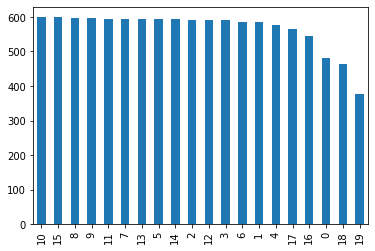

In [11]:
# 타겟 값 분포
data['target'].value_counts().plot(kind='bar');
print(data.groupby('target').count().T)

#### (3) 데이터 Split

In [12]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email = data['email']         # train feature
train_label = data['target']        # train target
test_email = newsdata_test.data     # test feature
test_label = newsdata_test.target   # test target

In [13]:
vocab_size = 10000  # max len
num_classes = 20

# 전처리 함수
def prepare_data(train_data, test_data, mode):
    tokenizer = Tokenizer(num_words = vocab_size) # vocab_size 만큼의 단어만 사용
    tokenizer.fit_on_texts(train_data)            # 기준 fit
    X_train = tokenizer.texts_to_matrix(train_data, mode=mode)  # data × vocab_size
    X_test = tokenizer.texts_to_matrix(test_data, mode=mode)    # data × vocab_size
    return X_train, X_test, tokenizer.index_word

In [14]:
# feature binary 모드로 변환
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary')
# target 원-핫 인코딩
y_train = to_categorical(train_label, num_classes)
y_test = to_categorical(test_label, num_classes)

In [15]:
print('train feature:', X_train.shape)
print('train target:', y_train.shape)
print('test feature:', X_test.shape)
print('test target:', y_test.shape)

train feature: (11314, 10000)
train target: (11314, 20)
test feature: (7532, 10000)
test target: (7532, 20)


In [16]:
print('빈도수 상위 5:',[index_to_word[i] for i in range(1, 6)])
print('빈도수 하위 5:',[index_to_word[i] for i in range(vocab_size-5, vocab_size)])

빈도수 상위 5: ['the', 'to', 'of', 'a', "'ax"]
빈도수 하위 5: ['atterlep', 'fairing', 'informative', 'nyu', 'mic']


### 10.4. 다층 퍼셉트론(Multilayer Perceptron, MLP)을 사용하여 텍스트 분류하기

* 입력값을 바꿔가면서 모델을 여러번 호출 -> 함수 정의

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(vocab_size,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5,
              verbose=0, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

![img](https://wikidocs.net/images/page/49071/multilayerperceptron.PNG)
* 총 4개의 층
  * vocab_size 크기(10000)의 입력층
  * 256개 뉴런의 은닉층1 (relu)
  * 128개 뉴런의 은닉층2 (relu)
  * num_classes 크기(20)의 출력층 
* 과적합 방지: 두 번의 드롭 아웃
* 다중 분류
  * 소프트 맥스 함수
  * 카테고리컬 크로스 엔트로피 (손실 함수)
* 은닉층이 2개이므로 깊은 신경망(Deep Neural Network, DNN)


In [23]:
# texts_to_matrix의 4가지 모드
modes = ['binary', 'count', 'tfidf', 'freq']

for mode in modes:
    # 모드에 따라서 데이터를 전처리
    X_train, X_test, _ = prepare_data(train_email, test_email, mode)
    # 모델을 훈련하고 평가
    score = fit_and_evaluate(X_train, y_train, X_test, y_test)
    print(f'{mode} 모드의 테스트 정확도: {round(score, 3)}')

binary 모드의 테스트 정확도: 0.827
count 모드의 테스트 정확도: 0.823
tfidf 모드의 테스트 정확도: 0.832
freq 모드의 테스트 정확도: 0.702


* 82% ~ 83%의 비슷한 정확도
* freq 모드에서만 정확도가 70%
* freq 모드는 이번 문제를 풀기위한 적절한 전처리 방법이 아님
---

## 11. 피드 포워드 신경망 언어 모델(Neural Network Language Model, NNLM)

* 배경 지식
  * 과거 기계가 자연어를 학습하게 하는 방법으로 통계적인 접근을 사용
    * 통계적 언어 모델(Statistical Language Model, SLM)
  * 최근에는 인공 신경망을 사용하는 방법이 자연어 처리에서 더 좋은 성능
    * 자연어 생성(Natural Language Generation, NLG)
  * 통계적 언어 모델에서 다양한 구조의 인공 신경망을 사용한 언어 모델들로 대체

* 피드 포워드 신경망 언어 모델(Feed Forward Neural Network Language Model)
  * 신경망 언어 모델의 시초 NNLM
  * RNNLM, BiLM 등 보다 발전된 신경망 언어 모델들을 배우기 전 시초를 훑자

#### 11.1. 기존 N-gram 언어 모델의 한계

* 언어 모델은 문장에 확률을 할당하는 모델
* 주어진 문맥으로부터 아직 모르는 단어를 예측하는 것을 언어 모델링이라 함
* N-gram 예시
  ```python 
  # 다음 단어 예측하기
  An adorable little boy is spreading _____
  ```

  * 언어 모델링에 바로 앞 n-1개의 단어를 참고
  * 4-gram 언어 모델이라고 가정. 모델은 바로 앞 3개의 단어만 참고
  * 빈 칸 예측에 사용되는 단어는 boy, is, spreading

 
$$P(w|boy, is, spreading)=\frac{count(boy, is, spreading, w)}{count(boy, is, spreading)}$$

  * boy is spreading가 1000번, boy is spreading insults가 500번, boy is spreading smiles가 200번 등장
    * P(insults | boy is spreading) = 0.500
    * P(smiles | boy is spreading) = 0.200

* 희소 문제(sparsity problem)
  * n-gram 언어 모델은 충분한 데이터를 관측하지 못하면 언어를 정확히 모델링하지 못함
  * boy is spreading smile라는 단어 시퀀스가 존재하지 않으면 n-gram 언어 모델에서 해당 단어 시퀀스의 확률은 0
  * 언어 모델이 판단하기에 boy is spreading 다음에는 smiles이란 단어가 나올 수 없다는 의미
  * 해당 단어 시퀀스는 현실에서 존재 가능한 시퀀스이므로 적절한 모델링이 아님

#### 11.2. 단어의 의미적 유사성

* **희소 문제**는 기계가 단어의 의미적 유사성을 알수 있다면 해결할 수 있는 문제
  * `...발표 자료를 살펴보다...`
  * p(살펴보다|발표 자료를) = 0.n
  * p(훑어보다|발표 자료를) = ~0~ -> 0.m
* 언어 모델 또한 단어의 의미적 유사성을 학습할 수 있도록 설계 목표
* 코퍼스에 없는 단어에 대한 예측이라도 **유사 단어**의 시퀀스를 참고하여 예측 정확도 보정
  * **NNLM 신경망**
  * 워드 임베딩 (벡터간 유사도)

#### 11.3. 피드 포워드 신경망 언어 모델(NNLM)

#### (1) 예문 : "what will the fat cat sit on"
  * 언어 모델은 주어진 단어 시퀀스로부터 다음 단어를 예측
  * what will the fat cat __ => sit 을 예측


#### (2) 기계가 단어를 인식할 수 있도록 모든 단어 수치화 (인코딩)
  ```python
  # 원 핫 인코딩
  what = [1, 0, 0, 0, 0, 0, 0]
  will = [0, 1, 0, 0, 0, 0, 0]
  the = [0, 0, 1, 0, 0, 0, 0]
  fat = [0, 0, 0, 1, 0, 0, 0]
  cat = [0, 0, 0, 0, 1, 0, 0]
  sit = [0, 0, 0, 0, 0, 1, 0]
  on = [0, 0, 0, 0, 0, 0, 1]
  ```
  * NNLM의 입력이면서 예측을 위한 레이블
  * what will the fat cat 입력 => sit 예측

#### (3) NNLM 훈련
  * NNLM은 정해진 개수(**window**)의 단어만을 참고하여 예측 (n-gram과 동일)
  
  ![img](https://wikidocs.net/images/page/45609/nnlm1.PNG)
  * 4개의 단어 입력 => 다중 클래스 예측(오차 발생) => 학습(손실 함수에 따라 parameter 조정)
  * Input Layer (입력층)
    * 윈도우 4, 원 핫 인코딩 입력
  * Projection Layer (투사층)
  
  ![img](https://wikidocs.net/images/page/45609/nnlm2_renew.PNG)
    * fat을 의미하는 원-핫 벡터 X fat
    * W (가중치)
      * 단어 집합의 크기 V(7), 투사층의 크기 M(5)
      * 투사층: 가중치 행렬과의 곱셈은 이루어지지만 활성화 함수가 존재하지 않음
      * 룩업 테이블: 원-핫 벡터와 가중치 W 행렬의 곱은 사실 W행렬의 i번째 행을 그대로 읽어오는 것과(lookup) 동일
    * 룩업 테이블 과정을 거친 임베딩 벡터 e fat
      * 임베딩 벡터: 초기 랜덤한 값을 가지지만 학습 과정에서 값이 변경되는 벡터
    * 각 단어가 테이블 룩업을 통해 임베딩 벡터로 변경되고, 투사층에서 모든 임베딩 벡터들의 값은 연결(concatenate) 
    
    ![img](https://wikidocs.net/images/page/45609/nnlm3_renew.PNG)
  * Hidden Layer (은닉층)
    * 은닉층의 입력은 가중치 곱해진 후 편향이 더해져 활성화 함수의 입력
  * Output Layer (출력층)

    ![img](https://wikidocs.net/images/page/45609/nnlm5_final.PNG)
    * 은닉층의 출력은 V의 크기
    * 출력층 활성화 함수: 소프트맥스(softmax)
      * 벡터의 각 원소는 0과 1사이의 실수값을 가지며 총 합은 1
    * 손실 함수: 크로스 엔트로피(cross-entropy) 함수
      * 역전파를 통해 가중치 행렬(투사층 + 은닉층)들이 학습

#### (4) 의의
* 만약 충분한 훈련 데이터가 있다면? 
  * 충분한 양의 훈련 코퍼스를 위와 같은 과정으로 학습
  * 수많은 문장에서 유사한 목적으로 사용되는 단어들은 결국 유사한 임베딩 벡터값을 얻음
  * 훈련이 끝난 후 다음 단어를 예측 과정에서 훈련 코퍼스에서 없던 단어 시퀀스라 하더라도 다음 단어를 선택이 가능

* 단어 간 유사도를 구하는 임베딩 벡터의 아이디어
  * Word2Vec, FastText, GloVe 등으로 발전
  * 워드 임베딩 챕터에서 자세히 다룸

#### 11.4. NNLM의 이점과 한계
* NNLM은 기존 n-gram 언어 모델의 한계를 개선

#### (1) 이점: 기존 모델에서의 개선점
1. NNLM은 단어를 표현하기 위해 **임베딩 벡터**를 사용하므로서 **단어의 유사도**를 계산
2. 이를 통해 희소 문제(sparsity problem)를 해결

#### (2) 고정된 길이의 입력(Fixed-length input)
* n-gram과 같이 정해진 n개의 단어만을 참고 (window)
* 한계를 극복할 수 있는 언어 모델 존재
  * RNN(Recurrent Neural Network) 언어 모델
---